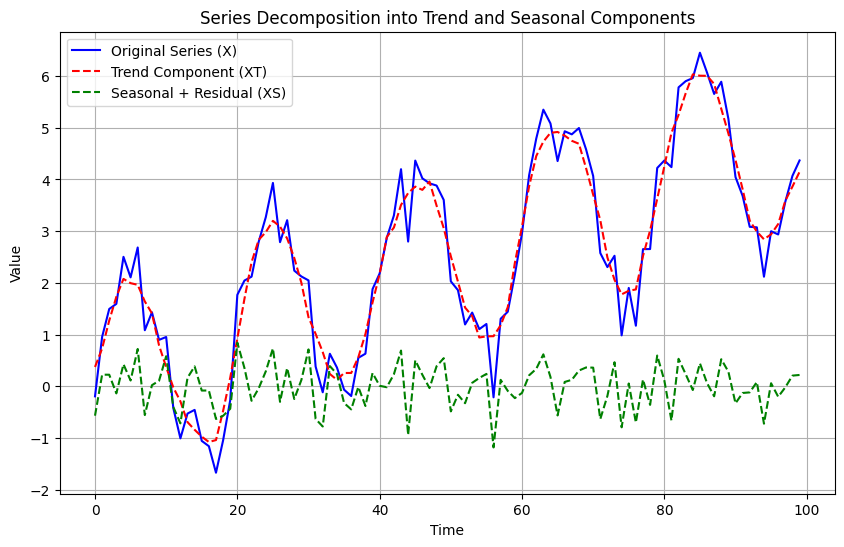

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a time series with trend and seasonality
T = 100  # Number of time points
time = np.arange(T)
trend = 0.05 * time  # Linear trend component
seasonality = 2 * np.sin(2 * np.pi * time / 20)  # Sinusoidal seasonality component
noise = np.random.normal(0, 0.5, T)  # Adding some noise
X = trend + seasonality + noise  # Original time series

# Applying average pooling (moving average) to extract trend
window_size = 5  # Window size for average pooling
padding = (window_size - 1) // 2  # Padding to maintain sequence length

# Padding the time series at both ends
padded_X = np.pad(X, (padding, padding), mode='edge')

# Applying moving average (average pooling)
XT = np.convolve(padded_X, np.ones(window_size)/window_size, mode='valid')

# Calculating the seasonal + residual component
XS = X - XT

# Plotting the original series, trend, and seasonal components
plt.figure(figsize=(10, 6))
plt.plot(time, X, label="Original Series (X)", color='blue')
plt.plot(time, XT, label="Trend Component (XT)", color='red', linestyle='--')
plt.plot(time, XS, label="Seasonal + Residual (XS)", color='green', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.title("Series Decomposition into Trend and Seasonal Components")
plt.grid(True)
plt.show()


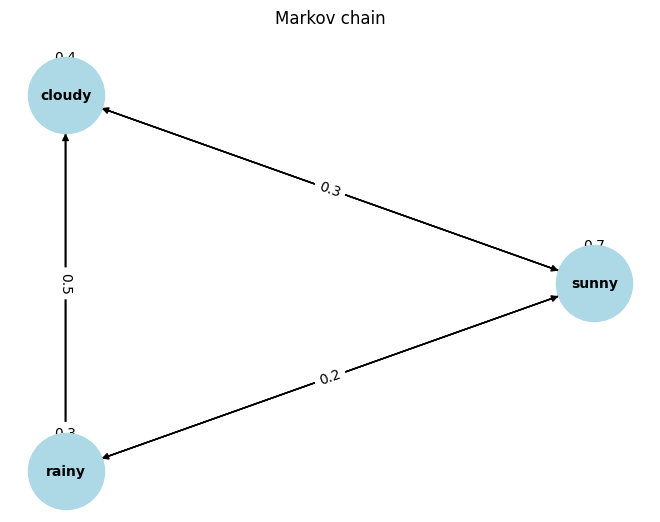

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 상태 전이 확률 행렬 (맑음, 흐림, 비)
transition_matrix = np.array([[0.7, 0.2, 0.1],
                              [0.3, 0.4, 0.3],
                              [0.2, 0.5, 0.3]])

# 상태 정의
states = ["sunny", "cloudy", "rainy"]

# 그래프 생성
G = nx.DiGraph()

# 노드 추가
for state in states:
    G.add_node(state)

# 엣지 추가 (전이 확률을 엣지의 가중치로 사용)
for i in range(len(states)):
    for j in range(len(states)):
        if transition_matrix[i][j] > 0:  # 전이 확률이 0이 아니면 엣지 추가
            G.add_edge(states[i], states[j], weight=transition_matrix[i][j])

# 엣지 레이블(확률) 가져오기
edge_labels = {(states[i], states[j]): f"{transition_matrix[i][j]:.1f}" for i in range(len(states)) for j in range(len(states)) if transition_matrix[i][j] > 0}

# 그래프 레이아웃 설정 (circular layout 사용)
pos = nx.circular_layout(G)

# 노드 그리기
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

# 엣지 그리기 (화살표)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

# 엣지 레이블 그리기 (전이 확률)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# 그래프 보여주기
plt.title("Markov chain")
plt.show()


In [1]:
import inspect

In [ ]:
**